### Applied Data Science Capstone - IBM/Coursera

### Capstone Project - Car Accident Severity

Applied Data Science Capstone by IBM/Coursera

Table of contents

Introduction: Business Problem

- Data
- Methodology
- Analysis
- Prediction
- Results and Evaluation

**Introduction: Business Problem**
In this Capstone project, I will attempt to find the leading factors to traffic accidents in the Seattle, Washinton Area. Specifically, this report will targeting the local Seatlle Government to provide more specific information about the severity traffic accidents in the city. More specifically, I will leverage the accident data that I found to predict the different accidents' severity, by building a machine learning (ML) model to predict accident severity, based on fatilities, traffic delays, and other related data.

**Data**
After obtaining a greater understanding of the issues with traffic accidents in the Seattle, Washington area, I decided to use the sample "Data-Collisions.csv" file, provided by IBM Watson to assist in the the prediction of traffic accidents' severity. The data included contain accident records in Seattle of a date range from 01January2004 to 02May2020. In the data set, there are 194673 events.

**Based on definition of our problem, factors that will influence decisions makers are the following:**

- Number of pedestrians in the various mediums (e.g., in vehicles, bicycles, walking, etc.)
- Number of vehicles involved
- Other environmental factors of contribution (e.g., weather, road conditions, lighting)
- Along with the severity level of the accident

**As a result, the following attributes will be analyzed:**

- The target for prediction being SEVERITYCODE, as that is what is used to measure the severity of the accident. This column has two possible values, as follows: 1 - Property Damage 2 - Injury
- The features that will be used to predict the severity level are the following: PEDCOUNT PEDCYLCOUNT VEHCOUNT WEATHER ROADCOND LIGHTCOND ** and the newly created 'Seattle Seasons'

* Note: Some of these items are categorial and will need to be changed so that the ML models can handle these items.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import packages needed for the notebook
import pandas as pd
import numpy as np
import csv
import os
import datetime as dt
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print('Import Complete')

#Create directory for graph save:
mydir = 'Car_Accident_Charts'
if not os.path.isdir(mydir):
    os.mkdir(mydir)
print('Directory Creation Complete')

Import Complete
Directory Creation Complete


In [7]:
#Upload sample data for analysis. This includes the setting of display.max_columns to see all of the columns in the data set. 
pd.set_option('display.max_columns', None)
df1 = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

In [8]:
#Make a copy of the data frame for editing
df = df1.copy()

In [9]:
#Obtain basic statistics about the data set
data_info  = 'The following are the descriptive stats of the dataframe: \n'
data_info += '\t Data Shape: ' + str(df.shape) + '\n'
data_info += '\n'
data_info += '\t Data columns: ' + str(df.columns) + '\n'
data_info += '\n'
data_info += '\t Descriptive Statistics: ' + str(df.describe) + '\n'
data_info += '\n'
data_info += '\t Data Types: ' + str(df.dtypes) + '\n'
print(data_info)

The following are the descriptive stats of the dataframe: 
	 Data Shape: (194673, 38)

	 Data columns: Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

	 Descriptive Statistics: <bound method NDFrame.describe of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  

In [10]:
# View the first 3 rows of the data frame
df[:3]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


# Methodology

In [11]:
#Reduce the data frame to the intended columns for use in analysis
col = ['SEVERITYCODE', 'INCDTTM','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
        'WEATHER', 'ROADCOND', 'LIGHTCOND']
accidents = df[col]
accidents[:5]

,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight
1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight
3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight
4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight


In [12]:
#Reduce the data frame to the intended columns for use in analysis
col = ['SEVERITYCODE', 'INCDTTM','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
        'WEATHER', 'ROADCOND', 'LIGHTCOND']
accidents = df[col]
accidents[:5]

,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight
1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight
3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight
4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight


In [13]:
# Drop the rows that have null or NaN values. Then, reset the indexes
accidents = accidents.dropna()
accidents = accidents.reset_index()
accidents

,index,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight
1,1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight
3,3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight
4,4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight
5,5,1,4/20/2019 5:42:00 PM,2,0,0,2,Clear,Dry,Daylight
6,6,1,12/9/2008,2,0,0,2,Raining,Wet,Daylight
7,7,2,4/15/2020 5:47:00 PM,3,0,1,1,Clear,Dry,Daylight
8,8,1,6/15/2006 1:00:00 PM,2,0,0,2,Clear,Dry,Daylight
9,9,2,3/20/2006 3:49:00 PM,2,0,0,2,Clear,Dry,Daylight



After review of the documentation for the data set, the columns of interest here for possible predictive value for SEVERITYCODE are the following:

WEATHER
ROADCOND
LIGHTCOND

In [14]:
def create_barh_plot(df, title, save, color):
    plt.figure(figsize=(15,7))
    ax = df.plot(kind='barh', color = color )
    plt.xlabel('Counts')
    plt.ylabel('Types')
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    graph_title = title
    plt.title(graph_title, fontsize = 20, fontweight = 'bold')
    graph_title_for_save = save
    plt.savefig('Car_Accident_Charts/'+ graph_title_for_save + '.png')
    plt.show()

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


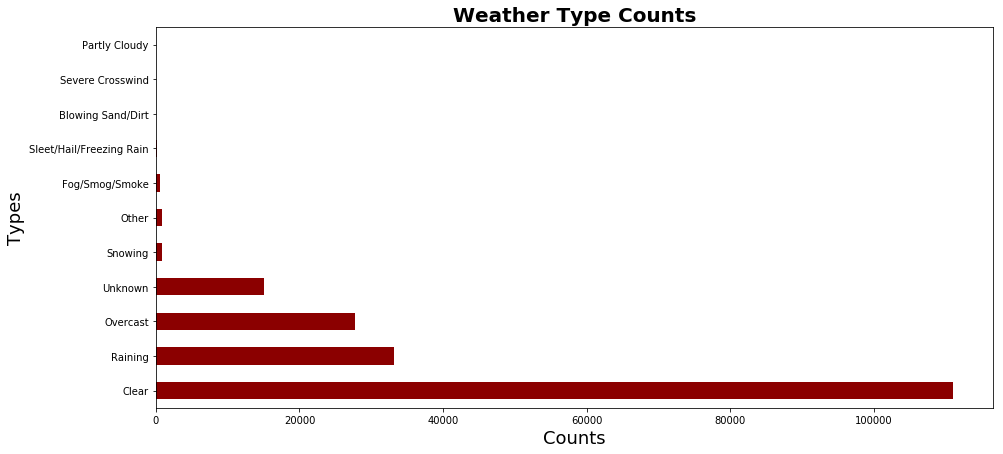

In [15]:
weather = accidents.WEATHER.value_counts()
print(weather)
create_barh_plot(weather, 'Weather Type Counts', 'weather_counts', 'darkred')

Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64


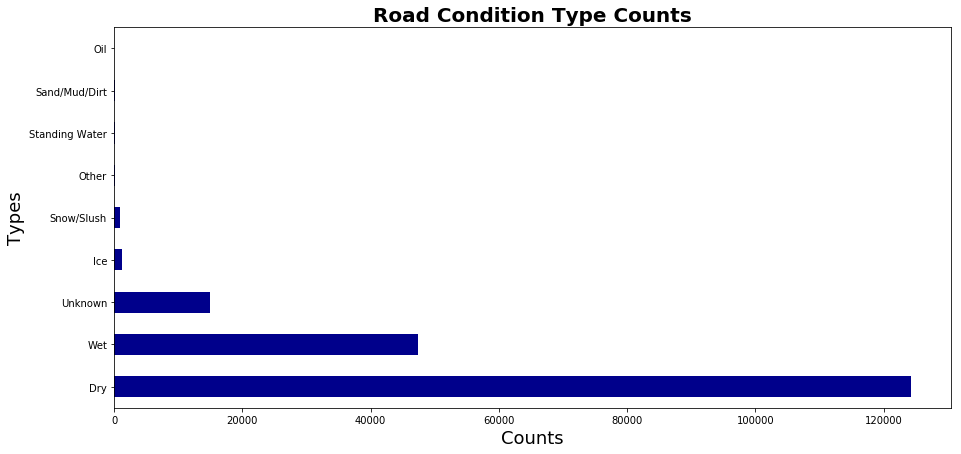

In [16]:
roadcond = accidents.ROADCOND.value_counts()
print(roadcond)
create_barh_plot(roadcond, 'Road Condition Type Counts', 'roadcond_counts', 'darkblue')

Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


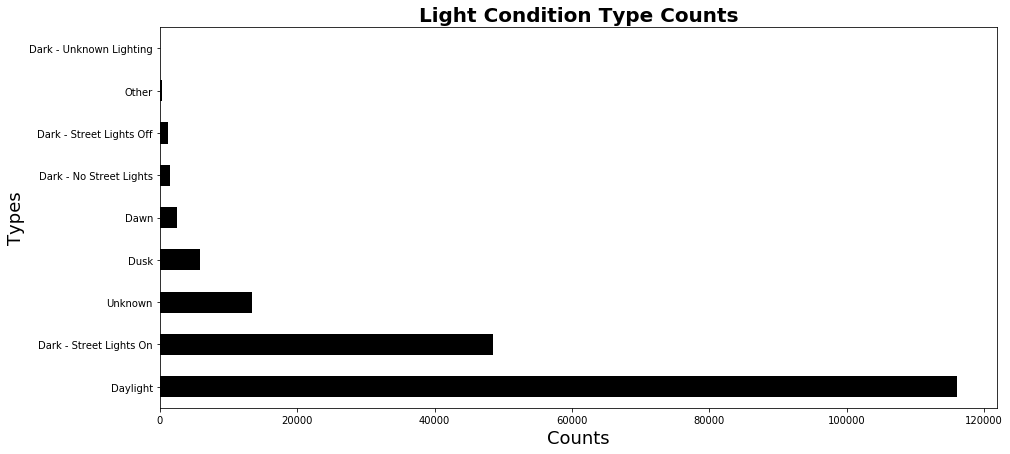

In [17]:
lightcond = accidents.LIGHTCOND.value_counts()
print(lightcond)
create_barh_plot(lightcond, 'Light Condition Type Counts', 'lightcond_counts', 'black')

In [18]:
#Change INCDTTM to datetime format for extraction of year and month for new columns. 
accidents['INCDTTM_dt'] = pd.to_datetime(accidents.INCDTTM)
accidents['INCDTTM_year'] = accidents.INCDTTM_dt.dt.year
accidents['INCDTTM_month'] = accidents.INCDTTM_dt.dt.month
accidents['INCDTTM_year_str'] = accidents.INCDTTM_year.astype(str)
accidents['INCDTTM_month_str'] = accidents.INCDTTM_month.astype(str)
accidents['INCDTTM_year_month'] = accidents[['INCDTTM_year_str','INCDTTM_month_str']].apply(lambda x: '-'.join(x),axis=1)

In [19]:
#Convert all column's object values to integers. 
weather_dict = {'Overcast':1, 'Raining':2, 'Clear':3, 'Other':4, 'Snowing':5,
               'Fog/Smog/Smoke':6, 'Sleet/Hail/Freezing Rain':7, 'Blowing Sand/Dirt':8,
               'Severe Crosswind':9, 'Partly Cloudy':10}
accidents['WEATHER_int'] = accidents.WEATHER.apply(lambda x: weather_dict.get(x)).fillna(0).astype(int)

roadcond_dict = {'Wet':1, 'Dry':2, 'Unknown':3, 'Snow/Slush':4, 'Ice':5, 'Other':6,
                'Sand/Mud/Dirt':7, 'Standing Water':8, 'Oil':9}
accidents['ROADCOND_int'] = accidents.ROADCOND.apply(lambda x: roadcond_dict.get(x)).fillna(0).astype(int)

light_dict = {'Daylight':1, 'Dark - Street Lights On':2, 'Dark - No Street Lights':3,
             'Unknown':4, 'Dusk':5, 'Dawn':6, 'Dark - Street Lights Off':7,
             'Other':8, 'Dark - Unknown Lighting':9}
accidents['LIGHTCOND_int'] = accidents.LIGHTCOND.apply(lambda x: light_dict.get(x)).fillna(0).astype(int)

#Assign seasons to weather in Seattle, as the seasonality may have an impact on the predictability of accident serverity. 
seattle_seasons = {12:'Winter', 1:'Winter', 2:'Winter',3:'Spring',4:'Spring',5:'Spring', 6:'Summer',7:'Summer', 8:'Summer',9:'Fall',10:'Fall',11:'Fall'}
accidents['SEATTLE_SEASONS'] = accidents.INCDTTM_month .apply(lambda x: seattle_seasons.get(x))

#View the first 5 rows
accidents[:5]

,index,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,INCDTTM_dt,INCDTTM_year,INCDTTM_month,INCDTTM_year_str,INCDTTM_month_str,INCDTTM_year_month,WEATHER_int,ROADCOND_int,LIGHTCOND_int,SEATTLE_SEASONS
0,0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight,2013-03-27 14:54:00,2013,3,2013,3,2013-3,1,1,1,Spring
1,1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On,2006-12-20 18:55:00,2006,12,2006,12,2006-12,2,1,2,Winter
2,2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight,2004-11-18 10:20:00,2004,11,2004,11,2004-11,1,2,1,Fall
3,3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight,2013-03-29 09:26:00,2013,3,2013,3,2013-3,3,2,1,Spring
4,4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight,2004-01-28 08:04:00,2004,1,2004,1,2004-1,2,1,1,Winter


# Analysis

In [20]:
#Create new dataframe to create a correlation heatmap of the different variables for prediction.
int_cols = ['SEVERITYCODE','INCDTTM_dt', 'INCDTTM_year', 'INCDTTM_month', 'INCDTTM_year_str',
       'INCDTTM_month_str', 'INCDTTM_year_month','WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int', 'SEATTLE_SEASONS']
severity = accidents[int_cols]
severity[:5]

,SEVERITYCODE,INCDTTM_dt,INCDTTM_year,INCDTTM_month,INCDTTM_year_str,INCDTTM_month_str,INCDTTM_year_month,WEATHER_int,ROADCOND_int,LIGHTCOND_int,SEATTLE_SEASONS
0,2,2013-03-27 14:54:00,2013,3,2013,3,2013-3,1,1,1,Spring
1,1,2006-12-20 18:55:00,2006,12,2006,12,2006-12,2,1,2,Winter
2,1,2004-11-18 10:20:00,2004,11,2004,11,2004-11,1,2,1,Fall
3,1,2013-03-29 09:26:00,2013,3,2013,3,2013-3,3,2,1,Spring
4,2,2004-01-28 08:04:00,2004,1,2004,1,2004-1,2,1,1,Winter


In [21]:
seasons  = severity.groupby(['SEATTLE_SEASONS'])['INCDTTM_year'].sum()
seasons

SEATTLE_SEASONS
Fall      98695381
Spring    95623925
Summer    96847426
Winter    89589995
Name: INCDTTM_year, dtype: int64

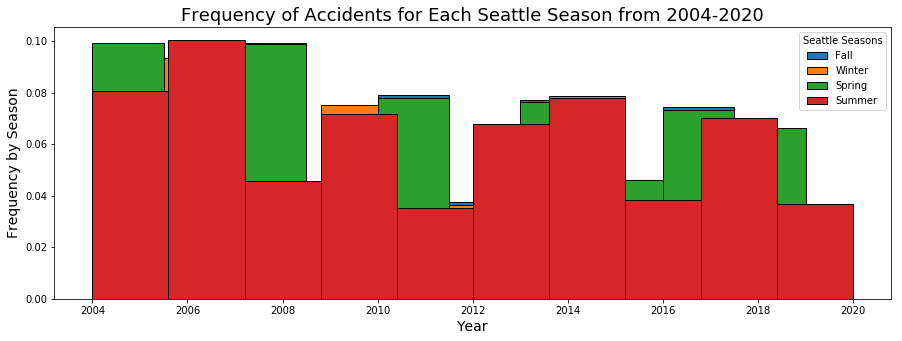

In [22]:
#Plot these values in a histogram
plt.figure(figsize=(15,5))
colors = ['red', 'green', 'blue', 'grey']
# seasons_df.hist(density = True, histtype = 'bar')
severity.groupby(['SEATTLE_SEASONS'])['INCDTTM_year'].hist(density = True, histtype = 'bar', ec='black')
plt.grid(False)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Frequency by Season', fontsize = 14)
plt.title('Frequency of Accidents for Each Seattle Season from 2004-2020', fontsize = 18)
plt.legend(['Fall', 'Winter', 'Spring', 'Summer'], title = 'Seattle Seasons')
graph_title_save = 'season_hist'
plt.savefig('Car_Accident_Charts/' + graph_title_save + '.png')
plt.show()

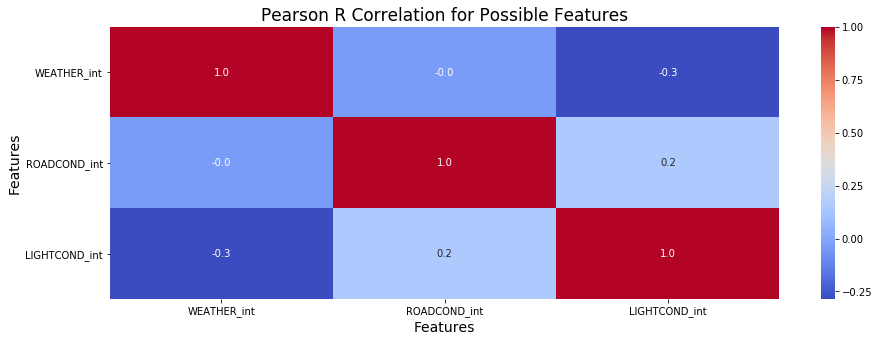

In [23]:
# Create a heatmap based on the Pearson R correlations to each int variable
severity_corr = severity[['WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int']].corr()
ax = sns.heatmap(severity_corr, cmap='coolwarm', annot=True, fmt='.1f')
ax.figure.set_size_inches(15,5)
plt.xlabel('Features')
plt.ylabel('Features')
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)
graph_title = 'Pearson R Correlation for Possible Features'
plt.title(graph_title, fontsize = 17)
graph_title_save = 'corr_heatmap'
plt.savefig('Car_Accident_Charts/' + graph_title_save + '.png')
plt.show()

# Prediction 
Data Preprocessing
In order to use the scikit-learn library, we need to convert the items from Pandas into a Numpy array.

X as the feature vector ('WEATHER', 'ROADCOND', 'LIGHCOND')
y as the predicted variable ('SEVERITYCODE')
The ML algorithms chosen were Decision Tree, K Nearest Neighbor (KNN), and Logistic Regression.

In [24]:
X = accidents[['WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int']].values
X[0:5]

array([[1, 1, 1],
       [2, 1, 2],
       [1, 2, 1],
       [3, 2, 1],
       [2, 1, 1]])

In [25]:
y = accidents[['SEVERITYCODE']].values
y[0:5]

array([[2],
       [1],
       [1],
       [1],
       [2]])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, jaccard_similarity_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
shift_ml = 'ML for Shift \n'
shift_ml += '\t X_train: ' + str(X_train.shape[0]) + '\n'
shift_ml += '\t y_train: ' + str(y_train.shape[0]) + '\n'
shift_ml += '\t X_test: ' + str(X_test.shape[0]) + '\n'
shift_ml += '\t y_test: ' + str(y_test.shape[0]) + '\n'
print(shift_ml)

ML for Shift 
	 X_train: 151469
	 y_train: 151469
	 X_test: 37868
	 y_test: 37868



In [27]:
def heatmap_for_confusion(df):
    fix,ax = plt.subplots(figsize = (15, 7))
    sns.heatmap(df, annot = True, fmt = 'd', cmap= 'Reds')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    graph_title = 'Heatmap for Confusion Matrix for Machine Learning Algorithms' 
    plt.show()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[26376    22]
 [11465     5]]
              precision    recall  f1-score   support

           1       0.70      1.00      0.82     26398
           2       0.19      0.00      0.00     11470

   micro avg       0.70      0.70      0.70     37868
   macro avg       0.44      0.50      0.41     37868
weighted avg       0.54      0.70      0.57     37868



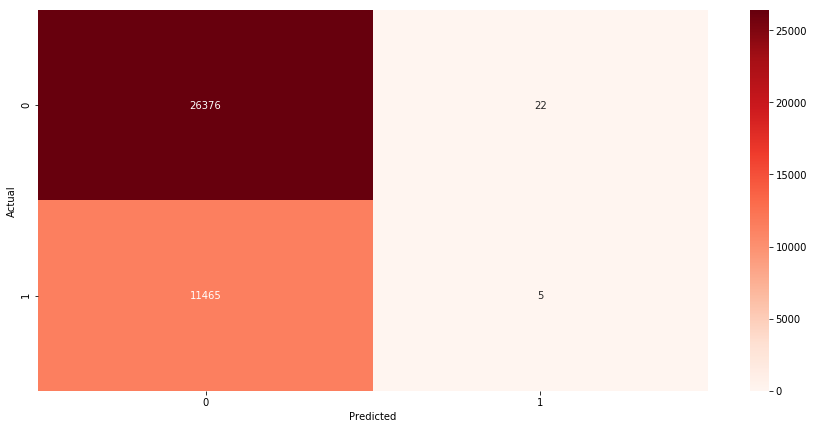

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print(model)

model.fit(X_train, y_train)
y_pred_DecisionTree = model.predict(X_test)

conf_mat_DecisionTree = confusion_matrix(y_test, y_pred_DecisionTree)
print(conf_mat_DecisionTree)

class_report = classification_report(y_test, y_pred_DecisionTree)
print(class_report)
heatmap_for_confusion(conf_mat_DecisionTree)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
[1 1 1 2 1]
              precision    recall  f1-score   support

           1       0.70      0.84      0.77     26398
           2       0.33      0.18      0.23     11470

   micro avg       0.64      0.64      0.64     37868
   macro avg       0.52      0.51      0.50     37868
weighted avg       0.59      0.64      0.60     37868



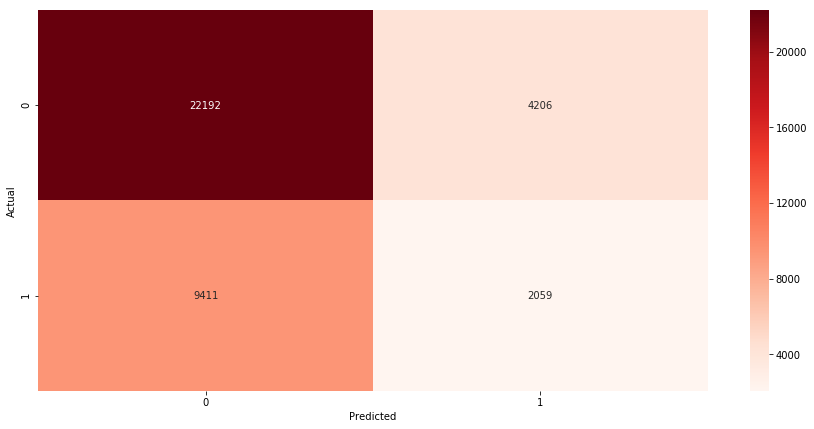

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN(n_neighbors = 3)
print(model)

model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
print(y_pred_knn[:5])

conf_mat = confusion_matrix(y_test, y_pred_knn)

class_report = classification_report(y_test, y_pred_knn)
print(class_report)
heatmap_for_confusion(conf_mat)

# Results and Evaluation
The definitions are listed here:

According to machinelearningmastery.com(2020) and statisticshowto.com(2020):

Precision quantifies the number of positive class predictions that actually belong to the positive class.
Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
F-Measure provides a single score that balances both the concerns of precision and recall in one number.
Jaccard Index compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations.